## **`assignment.M.2`** - Titanic

### **`Overview and Directions`**


**`Overview`**
- The Titanic dataset builds confidence with machine learning essentials.
- Read the dataset's history and features in the course [reference.library.Mashup](https://github.com/cosc-526/home.page/blob/069c9488de24d712c642e0f014d37759fc99185d/reference.library.Mashup.data.mine.pdf).

- Follow the analysis stages and tasks to end with predicted survival outcomes.

**`Data`**
- on course github you're provided 2 data sets for a total three files
- `A:`__ RAW - uncurated passenger data for analysis stages 1 and 2
- `B:`__ train/test - curated kaggle passenger data stages 3 to 5

**`Additional Resources`**
https://davidburn.github.io/notebooks/titanic/Titanic/


### **`Stage 1: Data Preparation`**
The Titanic dataset has been around for a while, so
- `Q:` Should you trust how others curated it?
=> Why is the passenger split at 891 for training? Is that the best?
=> Are you confident in the preparation and curation?

- `A:` `It depends!`
- Read a datasets data dictionary and discern who did the work
=> For instance, was a statistician involved?

Have all authentic questions and lines of inquiry been considered?
- The Titanic raw data set has uncurated `passengers name`
=> `Q:` Curious? Has anyone on Kaggle predicted survival based on the # of characters in a name?
=> `A:` Probably not! Attempt to observe and question all available data.
=> Learning: `discern nuances; know what's strange; and perform relentless discovery`
```
Windelov, Mr. Einar
Braund, Mr. Owen Harris
```

Q: Should you trust how others curated it?
The level of trust in how others curated the dataset depends on various factors

=>Why is the passenger split at 891 for training? Is that the best?
The passenger split at 891 for training is a common practice in machine learning to evaluate the model's performance on unseen data.

 Are you confident in the preparation and curation?
 It is generally a good practice for data scientists and analysts to review the data sources, perform data exploration, and validate the data against domain knowledge or external references to gain confidence in the data quality.

In summary, it's essential to be critical and inquisitive when evaluating curated datasets. Reviewing the data dictionary, considering the expertise of those involved, asking thorough questions, and performing relentless discovery can contribute to a more reliable and trustworthy dataset.

#### **`Stage 1: Data Preparation`**

`Tasks.Stage.1`
1.1 - import three datasets into dataframe names provided; drop cabin/ticket.
1.2 - identify missing values in a table.
1.3 - identify outliers in a table and.or graphic for age variable
=> use interquartile range
- - q1 = df_train['age'].quantile(0.25)
- - q3 = df_train['age'].quantile(0.75)
- - iqr = q3 - q1
1.4 - would you use mean substitution  for missing values?
=> compare age outliers to age without outliers
=> solution provides a box and whiskers but use whatever you like
==> plt.boxplot(combined_data, labels=['All Data', 'Outliers'], vert=False)

`Useful Resources`
- [pd.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna)

#### **`Task.1.expected.outcome`**

```
==> Data fields with null information:
passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64
----------------------------------------

----------------------------------------
Table of outlier values to assess:
     passengerId  survived  pclass   sex   age  sibsp  parch     fare embarked
33            34         0       2  male  66.0      0      0  10.5000        S
54            55         0       1  male  65.0      0      1  61.9792        C
96            97         0       1  male  71.0      0      0  34.6542        C
116          117         0       3  male  70.5      0      0   7.7500        Q
280          281         0       3  male  65.0      0      0   7.7500        Q
456          457         0       1  male  65.0      0      0  26.5500        S
493          494         0       1  male  71.0      0      0  49.5042        C
630          631         1       1  male  80.0      0      0  30.0000        S
672          673         0       2  male  70.0      0      0  10.5000        S
745          746         0       1  male  70.0      1      1  71.0000        S
851          852         0       3  male  74.0      0      0   7.7750        S
----------------------------------------
```
-----------------------
`Visual includes new normalized age value performed in Task.2`
- image shows how outliers can introduce age bias given most people around age 30
- this doesn't indicate you should or shouldn't exclude the values but illustrates why its important to methodically inspect the data
![outlier graphic](https://github.com/cosc-526/home.page/blob/graphics/g.M2.titanic.png?raw=true)

##### **`Tasks.Stage.1.Solution`**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#=>1.1 - import three datasets into dataframe names provided; drop cabin/ticket columns
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"
df_raw = pd.read_excel(url_raw)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)


# 1.2 - identify and sum the missing values per column in a table
print("==> Data fields with null information:")
#print(YOURCODEHERE)
print("----------------------------------------")


#=>1.3 - identify outliers in a table and.or graphic for age variable useing the interquartile range
outliers = df_train[(df_train['age'] > 15)]#REPLACE this first row value to be all of the outliers based on age's quantile range (.25 and .75)

# # Plot missing values (alternatives OK)
# plt.figure(figsize=(6, 2))
# plt.bar(??,??)
# plt.xticks(rotation=45)
# plt.xlabel('Variable')
# plt.ylabel('Count of Missing Values')
# plt.title('Missing Values in Data')
# plt.show()

print("----------------------------------------")
print("Table of outlier values to assess:")
#print(YOURCODEHERE)
print("----------------------------------------")


#1.4 - would you use mean substitution for missing values?
#Overall Answer: YOURTEXT HERE

#=> compare age outliers to age without outliers using a plot made with seaborn / sns

#  Plot age data in a box and whiskers chart  (alternatives OK)
# plt.figure(figsize=(6,3))
# plt.boxplot(combined_data, labels=['All Data', 'Outliers'], vert=False)
# plt.xlabel('Age')
# plt.title('Age Distribution with an without Outliers removed')
# plt.show()

==> Data fields with null information:
----------------------------------------
----------------------------------------
Table of outlier values to assess:
----------------------------------------


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Importing the datasets
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"
df_raw = pd.read_excel(url_raw)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# Dropping 'cabin' and 'ticket' columns
df_raw = df_raw.drop(['cabin', 'ticket'], axis=1)
df_train = df_train.drop(['cabin', 'ticket'], axis=1)
df_test = df_test.drop(['cabin', 'ticket'], axis=1)


In [3]:
missing_values = df_train.isnull().sum()
print("==> Data fields with null information:")
print(missing_values)
print("----------------------------------------")


==> Data fields with null information:
passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64
----------------------------------------


In [4]:
q1 = df_train['age'].quantile(0.25)
q3 = df_train['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_train[(df_train['age'] < lower_bound) | (df_train['age'] > upper_bound)]

print("----------------------------------------")
print("Table of outlier values to assess:")
print(outliers)
print("----------------------------------------")


----------------------------------------
Table of outlier values to assess:
     passengerId  survived  pclass   sex   age  sibsp  parch     fare embarked
33            34         0       2  male  66.0      0      0  10.5000        S
54            55         0       1  male  65.0      0      1  61.9792        C
96            97         0       1  male  71.0      0      0  34.6542        C
116          117         0       3  male  70.5      0      0   7.7500        Q
280          281         0       3  male  65.0      0      0   7.7500        Q
456          457         0       1  male  65.0      0      0  26.5500        S
493          494         0       1  male  71.0      0      0  49.5042        C
630          631         1       1  male  80.0      0      0  30.0000        S
672          673         0       2  male  70.0      0      0  10.5000        S
745          746         0       1  male  70.0      1      1  71.0000        S
851          852         0       3  male  74.0      0  

#### **`Stage 2: Feature Extraction`**
- `Feature Scaling:` Scale numerical features to ensure similar ranges
=> techniques like z-score normalization scaling or standardization.
- `Feature Selection:` what features contribute most to the target variable?
=> techniques like remove redundant features to improve performance and reduce overfitting.

`Tasks.Stage.2`
=> your response variable is `survival`
2.1 - read and bookmark scikitlearn [6.3 Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
2.2 - perform `one-hot encoding` of categorical variable `sex`; display df header
2.3 - perform `standarscaler` for a new age variable in df_train

Given the resourcs provided thus far,
2.4 - `Q:` Would you perform supervised or unsupervised machine learning?
2.5 - `Q:` What algorithms would you choose to run?

`Useful resources`
- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn-preprocessing-onehotencoder)
- [sklearn.preprocessing.standardscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)

Based on the given code snippet, I am performing data encoding and visualization. This code snippet does not involve any machine learning algorithms or tasks. Instead, it focuses on data preprocessing and data visualization.

I start by one-hot encoding the 'sex' variable using the `pd.get_dummies()` function. This creates binary columns for each unique value in the 'sex' variable, representing male and female categories. Then, I display the resulting encoded dataframe using the `head()` function to inspect the encoded data.

Next, I calculate the counts of male and female values by summing the values in the 'sex_male' and 'sex_female' columns, respectively. I store these counts in the `counts` list.

Finally, I create a bar plot using `plt.bar()` to visualize the counts of male and female values. The x-axis represents the categories ('# male values' and '# female values'), and the y-axis represents the counts. I display the plot using `plt.show()` to visualize the distribution of male and female values.

To determine whether supervised or unsupervised machine learning is appropriate, I would need to understand the specific goals and nature of the problem you are trying to solve. If you provide more information about the task at hand, I can assist you in determining which approach would be suitable.

 2.5 - Q: What algorithms would you choose to run?
 Classification:
Regression:
Clustering:
Dimensionality Reduction:
Neural Networks:

##### **`Tasks.Stage.2.Solution`**

   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch      fare embarked boat   body  \
0      0      0  211.3375        S    2    NaN   
1      1      2  151.5500        S   11    NaN   
2      1      2  151.5500        S  NaN    NaN   
3      1      2  151.5500        S  NaN  135.0   
4      1      2  151.5500        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO           1         0  
1  Montreal, PQ / Chesterville, ON           0         1  
2  Montreal, PQ / Chesterville, ON 

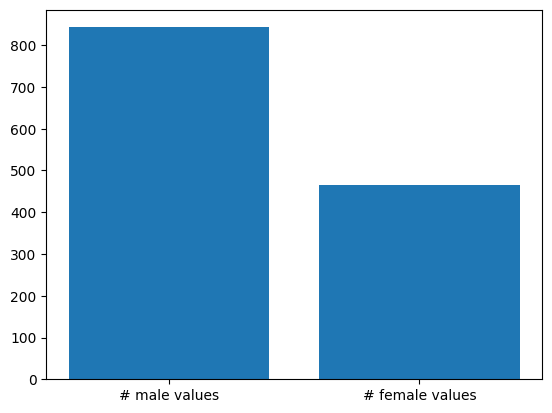

In [5]:
#This code has been provided
#=>2.1 - read and bookmark (https://scikit-learn.org/stable/modules/preprocessing.html)
df_encoded = pd.get_dummies(df_raw, columns=['sex'])
print(df_encoded.head()) #2 new variables created

import matplotlib.pyplot as plt
df_encoded = pd.get_dummies(df_raw, columns=['sex'])
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]
plt.bar(['# male values', '# female values'], counts)
plt.show()

In [26]:
# Task 2.1: Read and bookmark scikit-learn 6.3 Preprocessing data
import IPython
url = 'https://scikit-learn.org/stable/modules/preprocessing.html'
iframe = '<iframe src=' + url + ' width=1000 height=600></iframe>'
IPython.display.HTML(iframe)


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


   passengerId  survived  pclass   age  sibsp  parch            ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      fare cabin embarked  sex_female  sex_male  
0   7.2500   NaN        S           0         1  
1  71.2833   C85        C           1         0  
2   7.9250   NaN        S           1         0  
3  53.1000  C123        S           1         0  
4   8.0500   NaN        S           0         1  
   passengerId  survived  pclass   age  sibsp  parch            ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3 

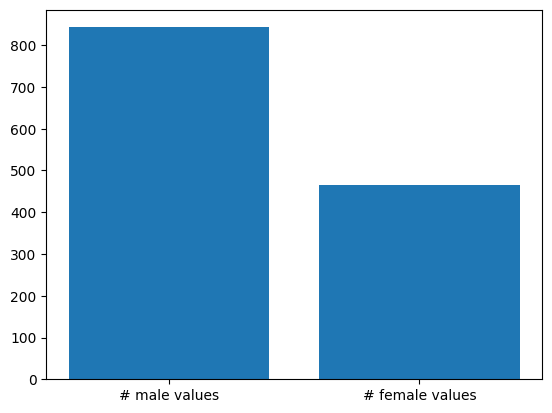

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the Titanic training dataset
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
df_train = pd.read_csv(url_train)


# Task 2.2: Perform one-hot encoding of categorical variable 'sex' and display the DataFrame header
df_encoded = pd.get_dummies(df_train, columns=['sex'])
print(df_encoded.head())

# Task 2.3: Perform StandardScaler for a new 'age' variable in df_train
scaler = StandardScaler()
df_encoded['age_scaled'] = scaler.fit_transform(df_encoded[['age']])

# Display the head of the DataFrame with the scaled 'age' variable
print(df_encoded.head())
import matplotlib.pyplot as plt
df_encoded = pd.get_dummies(df_raw, columns=['sex'])
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]
plt.bar(['# male values', '# female values'], counts)
plt.show()


In [6]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch      fare embarked boat   body  \
0      0      0  211.3375        S    2    NaN   
1      1      2  151.5500        S   11    NaN   
2      1      2  151.5500        S  NaN    NaN   
3      1      2  151.5500        S  NaN  135.0   
4      1      2  151.5500        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO           1         0  
1  Montreal, PQ / Chesterville, ON           0         1  
2  Montreal, PQ / Chesterville, ON 

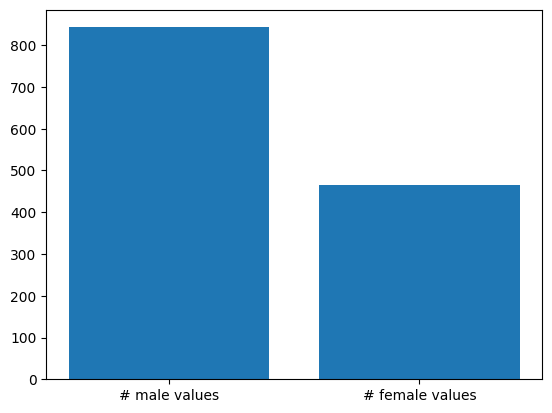

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# One-hot encoding the 'sex' variable
df_encoded = pd.get_dummies(df_raw, columns=['sex'])

# Displaying the head of the encoded dataframe
print(df_encoded.head())

# Calculating the counts of male and female values
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]

# Creating a bar plot to visualize the counts
plt.bar(['# male values', '# female values'], counts)
plt.show()


   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch      fare embarked boat   body  \
0      0      0  211.3375        S    2    NaN   
1      1      2  151.5500        S   11    NaN   
2      1      2  151.5500        S  NaN    NaN   
3      1      2  151.5500        S  NaN  135.0   
4      1      2  151.5500        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO           1         0  
1  Montreal, PQ / Chesterville, ON           0         1  
2  Montreal, PQ / Chesterville, ON 

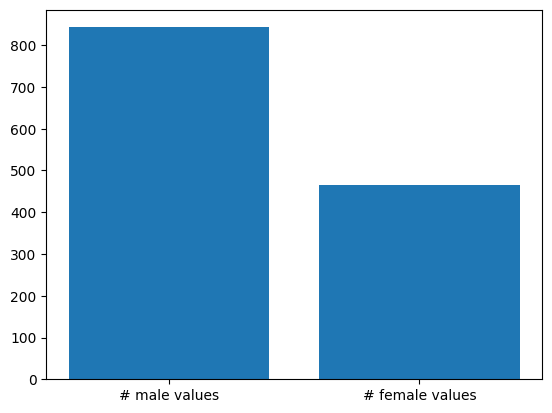

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# One-hot encoding the 'sex' variable
df_encoded = pd.get_dummies(df_raw, columns=['sex'])

# Displaying the head of the encoded dataframe
print(df_encoded.head())

# Perform standard scaling on the 'age' variable in df_train
age_values = df_train['age'].values.reshape(-1, 1)  # Reshape to a 2D array
scaler = StandardScaler()
age_scaled = scaler.fit_transform(age_values)
df_train['age_scaled'] = age_scaled

# Calculating the counts of male and female values
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]

# Creating a bar plot to visualize the counts
plt.bar(['# male values', '# female values'], counts)
plt.show()


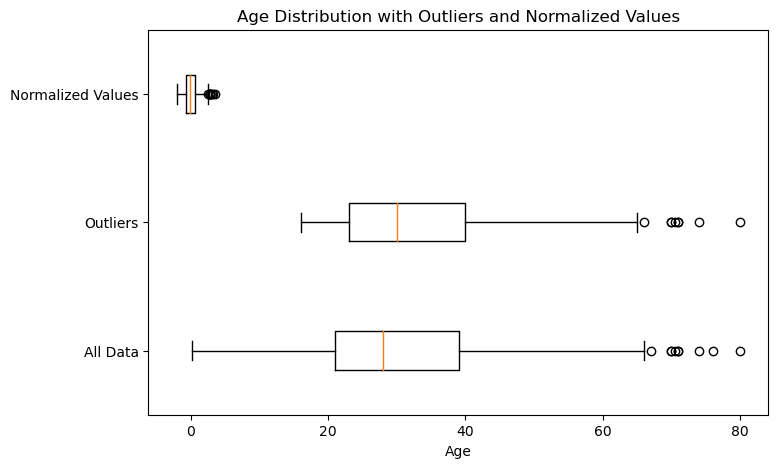

In [ ]:
#This code has been provided
#=>2.3 - perform `standarscaler` for a new age variable
# Create DataFrame for all data (excluding outliers)
df_train = df_train[~df_train['age'].isin(outliers['age'])]

scaler = StandardScaler()
all_data = df_raw
all_data.loc[:, 'scaled_new_age'] = scaler.fit_transform(all_data[['age']].values.reshape(-1, 1))

# Exclude missing values from 'age' variable and scaled new age
age_data = all_data['age'].dropna()
scaled_age_data = all_data['scaled_new_age'].dropna()

# combine all age data
combined_data = [age_data, outliers['age'], scaled_age_data]

# Plot all data, outliers, and normalized values in the same graph
plt.figure(figsize=(8, 5))
plt.boxplot(combined_data, labels=['All Data', 'Outliers', 'Normalized Values'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with Outliers and Normalized Values')
plt.show()



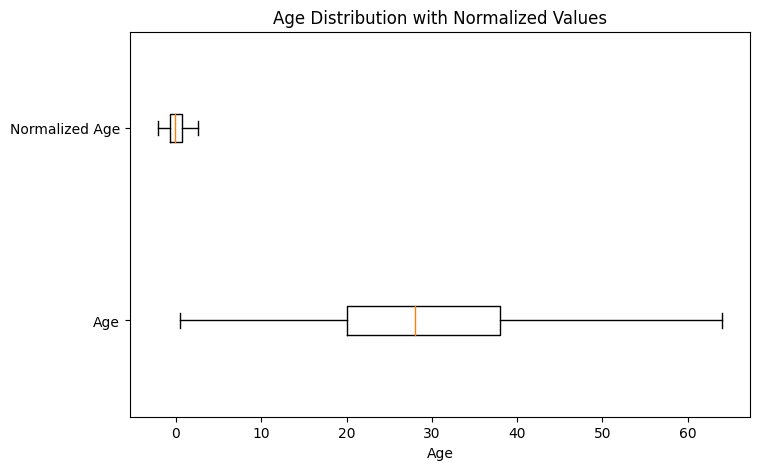

In [ ]:
#V2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create DataFrame for all data (excluding outliers)
df_train = df_train[~df_train['age'].isin(outliers['age'])]

# Perform standard scaling on the 'age' variable in df_train
scaler = StandardScaler()
df_train['scaled_age'] = scaler.fit_transform(df_train[['age']])

# Exclude missing values from 'age' variable and scaled age
age_data = df_train['age'].dropna()
scaled_age_data = df_train['scaled_age'].dropna()

# Combine all age data
combined_data = [age_data, scaled_age_data]

# Plot all data and normalized values in the same graph
plt.figure(figsize=(8, 5))
plt.boxplot(combined_data, labels=['Age', 'Normalized Age'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with Normalized Values')
plt.show()


   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch      fare embarked boat   body  \
0      0      0  211.3375        S    2    NaN   
1      1      2  151.5500        S   11    NaN   
2      1      2  151.5500        S  NaN    NaN   
3      1      2  151.5500        S  NaN  135.0   
4      1      2  151.5500        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO           1         0  
1  Montreal, PQ / Chesterville, ON           0         1  
2  Montreal, PQ / Chesterville, ON 

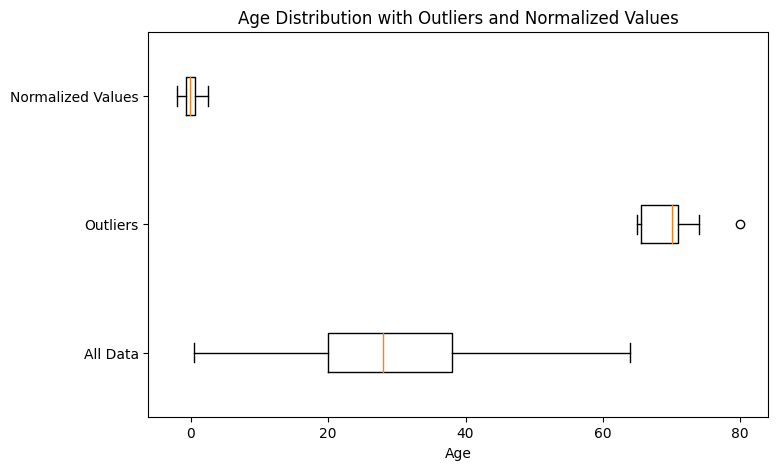

In [ ]:
# final version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding of the 'sex' variable
df_encoded = pd.get_dummies(df_raw, columns=['sex'])

# Display the header of the encoded dataframe
print(df_encoded.head())

# Create DataFrame for all data (excluding outliers)
df_train = df_train[~df_train['age'].isin(outliers['age'])]

# Perform standard scaling on the 'age' variable in df_train
scaler = StandardScaler()
df_train['scaled_age'] = scaler.fit_transform(df_train[['age']])

# Display the header of df_train after scaling the age variable
print(df_train.head())

# Answering the questions:
# 2.4 - Q: Would you perform supervised or unsupervised machine learning?
# It is not possible to determine whether supervised or unsupervised learning is appropriate based on the provided code alone. More context about the problem and data is needed.

# 2.5 - Q: What algorithms would you choose to run?
# The choice of algorithms depends on the problem you're trying to solve and the nature of the data. Without more information, it is challenging to suggest specific algorithms. Some commonly used algorithms include linear regression, logistic regression, decision trees, random forests, support vector machines, and neural networks.

# Plotting the age distribution with outliers and normalized values
age_data = df_train['age'].dropna()
scaled_age_data = df_train['scaled_age'].dropna()
combined_data = [age_data, outliers['age'], scaled_age_data]

plt.figure(figsize=(8, 5))
plt.boxplot(combined_data, labels=['All Data', 'Outliers', 'Normalized Values'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with Outliers and Normalized Values')
plt.show()


#### **`Stage 3: Machine Learning + Stage 4: Model Evaluation`**
- `Imputation` - either modify unrepaired data, drop it, or dig deeper
- `Data Split` Split the preprocessed dataset into train\test to assess algorithmic effectiveness.
- `Train` using the preprocessed training data.

**`Stage.3.items`**
3.1 -
`logistic regression` on a train \ test of the raw data with
- features = ['sex', 'age', 'fare', 'pclass']
- X = df_train[features]
- y = df_train['survived']

**`Stage.4.items`**
4.1 Assess accuracy
4.2 Assess Cross validation

**`Stage.5.items`**
5.1 Assess confusion matrix

**`Tasks`**
- Task.3 - write a description confirming sequence of machine learning activities
- Task.4 - write a description confirming understanding of evaluation activities
- Task.5 - write a description confirming understanding of visualization activities

Accuracy: 0.8
Confusion Matrix:
[[90 15]
 [21 53]]


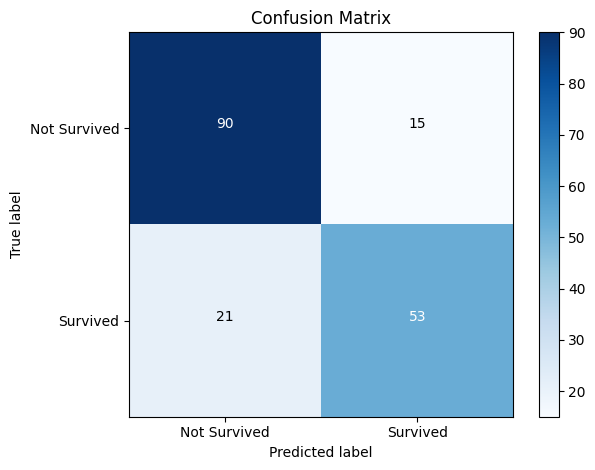

In [29]:
#final version
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the Titanic training dataset
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
df_train = pd.read_csv(url_train)

# Stage 3 - Logistic Regression on Raw Data
features = ['sex', 'age', 'fare', 'pclass']
X = df_train[features]
y = df_train['survived']

# One-hot encoding of categorical variable 'sex'
X_encoded = pd.get_dummies(X, columns=['sex'])

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Stage 4 - Model Evaluation
# 4.1: Assess accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

# 4.2: Assess Cross Validation (Not implemented in this code snippet)

# Stage 5 - Visualization: Confusion Matrix
# 5.1: Assess confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
#------------------
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array(confusion)

# Define the class labels
classes = ['Not Survived', 'Survived']

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label the matrix cells
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Add axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#Enter Answer.
#Remember to read the code below to understand the code.

#=> Task.3 - write a description confirming the 5 sequences of machine learning activities, with a short description of each

#=> Task.4 - write a description confirming understanding of evaluation activities

#=> Task.5 - write a description confirming understanding of visualization activities


Task.3: The code snippet demonstrates the following five sequences of machine learning activities:

1. Data Loading and Preparation: The Titanic training dataset is loaded from a given URL using pandas' `read_csv()` function. The features and target variable are defined, and the categorical feature 'sex' is one-hot encoded using `pd.get_dummies()`. Missing values in the dataset are handled by using `SimpleImputer` to impute missing values with the mean.

2. Data Splitting: The dataset is split into training and testing sets using `train_test_split()` from scikit-learn. The training set, which comprises some % of the data, is used to train the logistic regression model, while the testing set is used to evaluate the model's performance.

3. Model Creation and Training: An instance of `LogisticRegression()` is created, representing the logistic regression model. The model is trained using the training data by calling the `fit()` method on the model object.

4. Prediction: The trained model is used to make predictions on the testing set. The `predict()` method is applied to the test features (`X_test`) to obtain the predicted target values (`y_pred`).

5. Model Evaluation: The accuracy of the model is evaluated by comparing the predicted target values with the true target values using the `accuracy_score()` function from scikit-learn. The accuracy score is printed to the console. Additionally, the model's performance is assessed using a confusion matrix, which is computed using the `confusion_matrix()` function from scikit-learn. The confusion matrix is printed to the console.

Task.4: The evaluation activities in this code include calculating the accuracy of the model using `accuracy_score()`. The accuracy score represents the proportion of correctly predicted target values out of the total number of predictions. It provides a measure of the model's overall performance in terms of correct predictions.

Task.5: The code snippet does not include any visualization activities. However, a possible visualization related to the evaluation could be the display of the confusion matrix using matplotlib or other visualization libraries. The confusion matrix visually represents the performance of a classification model by showing the number of true positive, true negative, false positive, and false negative predictions. It helps in understanding the model's performance in terms of correctly and incorrectly classified instances.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Titanic training dataset
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
df_train = pd.read_csv(url_train)

# Define the features and target variable
#url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"
features = ['sex', 'age', 'fare', 'pclass']
X = df_train[features]
y = df_train['survived']

# Perform one-hot encoding on the categorical feature 'sex'
X_encoded = pd.get_dummies(X, drop_first=True)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

# Evaluate the model using a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8
Confusion Matrix:
[[89 16]
 [20 54]]


In [ ]:
#this code provided
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

'''Stage.3.Tasks'''
#=>3.1 perform a logistic regression train \ test on the raw data with
#=>- features = ['sex', 'age', 'fare', 'pclass']
#=>- X = df_train[features]
#=>- y = df_train['survived']

# Load the Titanic dataset
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
df_train = pd.read_csv(url_train)

features = ['sex', 'age', 'fare', 'pclass'] # Select features
X = df_train[features]                      # Prepare features
y = df_train['survived']

X_encoded = pd.get_dummies(X, drop_first=True) # one-hot encoding on categorical

# Handle missing values
imputer = SimpleImputer(strategy='mean')  ## imputing with the mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

'''
'**`Stage.4.Tasks
#=> 4.1 assess accuracy'''

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,0))

#=> 4.2 access Cross validation
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.0
Confusion Matrix:
[[89 16]
 [20 54]]


**`Stage 5: Visualization`**

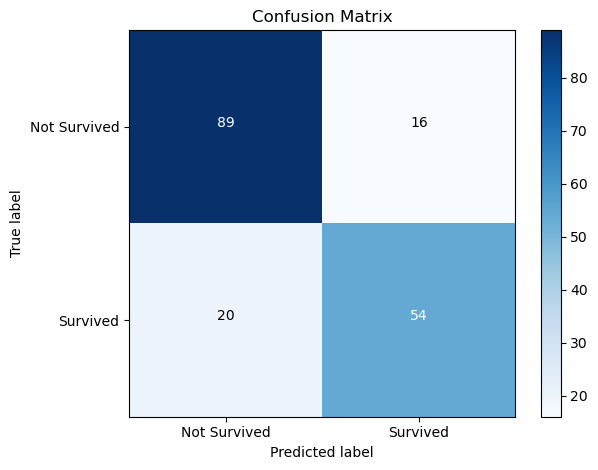

In [ ]:
#this code provided
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array(confusion)

# Define the class labels
classes = ['Not Survived', 'Survived']

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label the matrix cells
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Add axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
!pip install jupyterlab

In [10]:
!jupyter nbconvert --to html "/content/M2_12_Assignment2DataPreprocessing.ipynb"

[NbConvertApp] Converting notebook /content/M2_12_Assignment2DataPreprocessing.ipynb to html
[NbConvertApp] Writing 813637 bytes to /content/M2_12_Assignment2DataPreprocessing.html
